# Job Nature and Company Profiles: - Topic Modeling

<b>Importing Libraries

In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
import nltk
import re
import string
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aanchal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aanchal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<b>Load Dataset

In [36]:
# read csv into a DataFrame
data = pd.read_csv('data job posts.csv',parse_dates= ['date'])
data.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [37]:
data.columns

Index(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC', 'Attach',
       'Year', 'Month', 'IT'],
      dtype='object')

<b>Data Cleaning Steps:-

<b>1)Create a dataframe with useful columns

In [38]:
data1=data[['jobpost','Title','JobRequirment','JobDescription','RequiredQual','AboutC','IT','Year']]
data1.head()

,jobpost,Title,JobRequirment,JobDescription,RequiredQual,AboutC,IT,Year
0,AMERIA Investment Consulting Company\nJOB TITL...,Chief Financial Officer,- Supervises financial management and administ...,AMERIA Investment Consulting Company is seekin...,"To perform this job successfully, an\nindividu...",NaN,False,2004
1,International Research & Exchanges Board (IREX...,Full-time Community Connections Intern (paid i...,NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,The International Research & Exchanges Board (...,False,2004
2,Caucasus Environmental NGO Network (CENN)\nJOB...,Country Coordinator,- Working with the Country Director to provide...,Public outreach and strengthening of a growing...,"- Degree in environmentally related field, or ...",The Caucasus Environmental NGO Network is a\nn...,False,2004
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,BCC Specialist,- Identify gaps in knowledge and overseeing in...,The LEAD (Local Enhancement and Development fo...,"- Advanced degree in public health, social sci...",NaN,False,2004
4,Yerevan Brandy Company\nJOB TITLE: Software D...,Software Developer,- Rendering technical assistance to Database M...,NaN,- University degree; economical background is ...,NaN,True,2004


<b>2)Removing duplicate rows based on Title & Jobpost

In [39]:
print(data1.shape)
df = data1.drop_duplicates(['jobpost','Title'])
print(df.shape)
print("Removed {0} duplicates (based on jobpost + Title)".format(data1.shape[0]-df.shape[0]))

(19001, 8)
(18892, 8)
Removed 109 duplicates (based on jobpost + Title)


<b>3)Data-Peprocessing steps--

In [40]:
df['jobpost'] = df['jobpost'].apply(lambda x: re.sub('\s+', ' ', x))  # remove newlines
df['jobpost'] = df['jobpost'].apply(lambda x: re.sub("\'", "", x))  # remove single quotes
df['jobpost'] = df['jobpost'].apply(lambda x: re.sub('\S*@\S*\s?', '', x))  # remove emails
re1 = '(www)'  # Web address 
re2 = '(\\.)'  # Any Single Character 
re3 = '((?:[a-z][a-z0-9_]*))'  # Variable Name 
rg = re.compile(re1 + re2 + re3, re.IGNORECASE | re.DOTALL)
df['jobpost'] = df['jobpost'].apply(lambda x: re.sub(rg, "", x))
df.jobpost = df.jobpost.apply(lambda x: re.sub('(\\d+)', "", x))  # remove numbers

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

<b>Tokenisation

In [41]:
df['jobpost_token'] = df.jobpost.map(word_tokenize)
df.jobpost_token.head()

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    [AMERIA, Investment, Consulting, Company, JOB,...
1    [International, Research, &, Exchanges, Board,...
2    [Caucasus, Environmental, NGO, Network, (, CEN...
3    [Manoff, Group, JOB, TITLE, :, BCC, Specialist...
4    [Yerevan, Brandy, Company, JOB, TITLE, :, Soft...
Name: jobpost_token, dtype: object

<b>Removing Punctuations,convrsion to lowercase and stopwords removal

In [42]:
def preprocess(tokens):
    tokens_nop = [t for t in tokens if t not in string.punctuation]
    tokens_nop = [t.lower() for t in tokens_nop]
    # wnl = nltk.WordNetLemmatizer()
    stop = stopwords.words('english')
    stop.extend(
        ['armenian', 'armenia', 'job', 'title', 'position', 'location', 'responsibilities', 'application', 'procedures',
         'deadline', 'required', 'qualifications', 'renumeration', 'salary', 'date', 'company', 'yerevan',
         'eligibility', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september',
         'october', 'november', 'december'])
    tokens_nostop = [t for t in tokens_nop if t not in stop]
    # tokens_lem = [wnl.lemmatize(t) for t in tokens_nostop]
    tokens_clean = [t for t in tokens_nostop if len(t) >= 3] 
    return tokens_clean

In [43]:
df['jobpost_processed'] = df.jobpost_token.apply(preprocess)

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<b>Lemmitisation

In [44]:
def lemmit(tokens):
    tokens_nop = [t for t in tokens if t not in string.punctuation]
    tokens_nop = [t.lower() for t in tokens_nop]
    # wnl = nltk.WordNetLemmatizer()
    stop = stopwords.words('english')
    stop.extend(
        ['armenian', 'armenia', 'job', 'title', 'position', 'location', 'responsibilities', 'application', 'procedures',
         'deadline', 'required', 'qualifications', 'renumeration', 'salary', 'date', 'company', 'yerevan',
         'eligibility', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september',
         'october', 'november', 'december'])
    tokens_nostop = [t for t in tokens_nop if t not in stop]
    # tokens_lem = [wnl.lemmatize(t) for t in tokens_nostop]
    tokens_clean = [t for t in tokens_nostop if len(t) >= 3] 
    lem = nltk.WordNetLemmatizer()
    tokens_lem = [lem.lemmatize(t) for t in tokens_clean]
    return tokens_lem

In [45]:
df['jobpost_processed'] =df.jobpost_token.apply(lemmit)

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
df['jobpost_processed']

0        [ameria, investment, consulting, chief, financ...
1        [international, research, exchange, board, ire...
2        [caucasus, environmental, ngo, network, cenn, ...
3        [manoff, group, bcc, specialist, manila, phili...
4        [brandy, software, developer, rendering, techn...
5        [boutique, appollo, saleswoman, work, hour, on...
6        [osi, assistance, foundation, branch, office, ...
7        [international, research, exchange, board, ire...
8        [brandy, assistant, managing, director, coordi...
9        [american, embassy, announcement, number, prog...
10       [international, research, exchange, board, ire...
11       [international, research, exchange, board, ire...
12       [institute, sustainable, community, isc, chief...
13       [food, security, regional, cooperation, stabil...
14       [teleplus, llc, general, manager, manage, cont...
15       [netcall, communication, network, administrato...
16       [soc.stockholm, utopian, world, championship, .

<b>Making Bigrams

In [47]:
# Build the bigram model
import gensim
bigram = gensim.models.Phrases(df['jobpost_processed'], min_count=5, threshold=100)  # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [48]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [49]:
df.jobpost_processed = make_bigrams(df.jobpost_processed)

C:\Users\Aanchal\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


<b>Test all preprocessing steps in Software Developer Job

In [50]:
tokens_clean = lemmit((df.iloc[4])['jobpost_token']) # we know this is a software job
print(tokens_clean)

['brandy', 'software', 'developer', 'rendering', 'technical', 'assistance', 'database', 'management', 'system', 'realization', 'sql', 'server', 'maintenance', 'activity', 'back-up', 'replication', 'participation', 'designing', 'software', 'development', 'project', 'university', 'degree', 'economical', 'background', 'plus', 'excellent', 'knowledge', 'window', 'server', 'networking', 'tcp/', 'technology', 'sql', 'server', 'visual', 'basic', 'least', 'year', 'experience', 'database', 'software', 'development', 'good', 'knowledge', 'english', 'remuneration', 'commensurate', 'norm', 'accepted', 'successful', 'candidate', 'submit', 'relevant', 'recommendation', 'letter', 'previous', 'employer', 'copy', '-ies', 'diploma', 'relevant', 'certificate', 'available', 'color', 'photo', 'either', 'isakov', 'avenue', 'send', 'following', 'fax', 'e-mail', 'human', 'resource', 'department', 'armine', 'bibilyan', 'please', 'clearly', 'mention', 'letter', 'learned', 'opportunity', 'career', 'center', 'men

<b> Making Wordcloud for Software Developer Job

In [51]:
def plotWC(tokens):
    text_clean = " ".join(tokens)
    print(text_clean)
    wc = WordCloud(background_color="white").generate(text_clean)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    plt.figure(figsize=(20, 9))
    fd = nltk.FreqDist(tokens)  
    fd.plot(50)

brandy software developer rendering technical assistance database management system realization sql server maintenance activity back-up replication participation designing software development project university degree economical background plus excellent knowledge window server networking tcp/ technology sql server visual basic least year experience database software development good knowledge english remuneration commensurate norm accepted successful candidate submit relevant recommendation letter previous employer copy -ies diploma relevant certificate available color photo either isakov avenue send following fax e-mail human resource department armine bibilyan please clearly mention letter learned opportunity career center mention url website .am thanks place free posting career related opportunity organization careercenter.am website e-mail


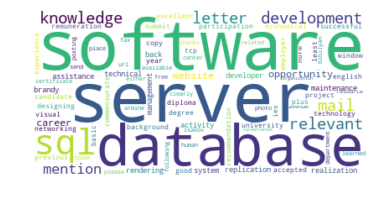

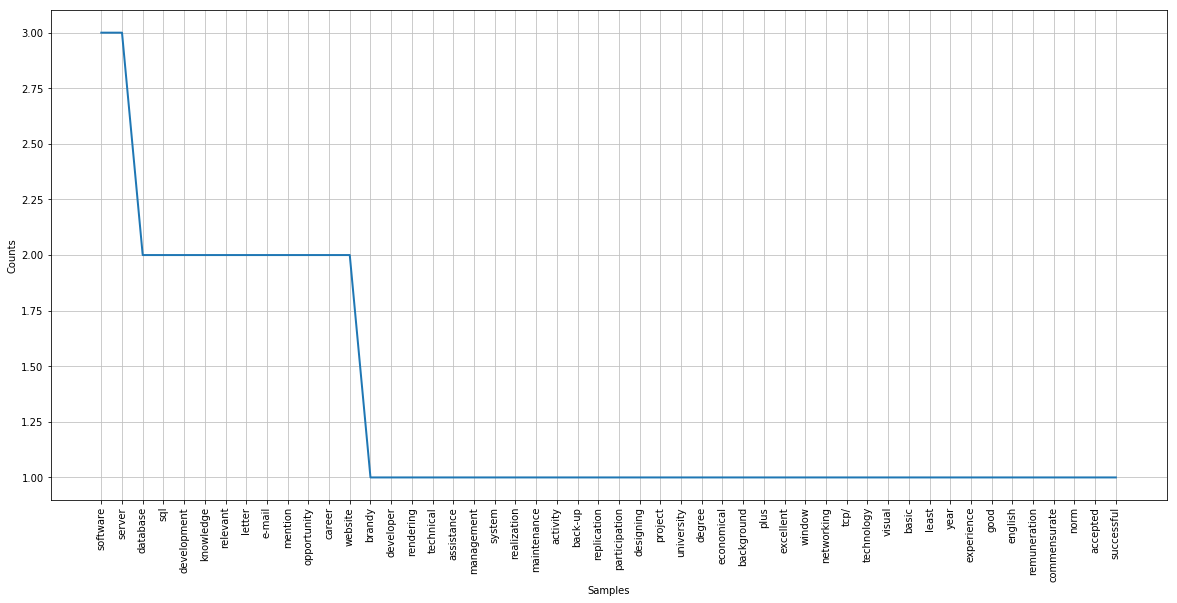

In [52]:
plotWC(tokens_clean)

<b>Topic Modeling- LDA with gensim

In [53]:
#Imorting libraries
import spacy
import gensim
from gensim import corpora

In [54]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(df['jobpost_processed'])
dictionary.filter_extremes(no_below=3, no_above=0.7)

In [55]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
dtm_data = [dictionary.doc2bow(text) for text in df['jobpost_processed']]

In [83]:
# Creating the object for LDA model using gensim library
# Running and Trainign LDA model on the document term matrix.
NUM_TOPICS = 7
ldamodel = gensim.models.ldamodel.LdaModel(dtm_data, num_topics = NUM_TOPICS, id2word=dictionary,alpha='auto',chunksize= 30,passes=20,random_state=123)
dtopics = ldamodel.get_document_topics(dtm_data)
ldamodel.save('model5.gensim')

In [86]:
#For each topic, we will explore the words occuring in that topic and its relative weight.
topics = ldamodel.print_topics(num_words=15)
#ldamodel.show_topics()
for topic in topics:
    print(topic)

(0, '0.025*"software" + 0.024*"development" + 0.020*"design" + 0.018*"team" + 0.013*"system" + 0.013*"developer" + 0.011*"test" + 0.011*"ability" + 0.011*"technical" + 0.011*"technology" + 0.011*"web" + 0.009*"application" + 0.009*"plus" + 0.009*"good" + 0.008*"develop"')
(1, '0.035*"project" + 0.018*"development" + 0.015*"management" + 0.014*"activity" + 0.013*"support" + 0.012*"ensure" + 0.012*"program" + 0.011*"implementation" + 0.010*"ability" + 0.009*"including" + 0.008*"provide" + 0.008*"staff" + 0.007*"plan" + 0.007*"community" + 0.007*"related"')
(2, '0.043*"financial" + 0.032*"accounting" + 0.026*"report" + 0.020*"finance" + 0.017*"internal" + 0.016*"tax" + 0.016*"audit" + 0.015*"control" + 0.015*"prepare" + 0.013*"management" + 0.013*"legislation" + 0.013*"branch" + 0.012*"system" + 0.011*"process" + 0.011*"reporting"')
(3, '0.015*"ability" + 0.014*"excellent" + 0.013*"service" + 0.012*"subject" + 0.012*"responsible" + 0.012*"interested" + 0.011*"customer" + 0.011*"line" + 0.

<b>Print the words occuring in that topic and its relative weight

In [87]:

ldamodel.show_topics()

[(0,
  '0.025*"software" + 0.024*"development" + 0.020*"design" + 0.018*"team" + 0.013*"system" + 0.013*"developer" + 0.011*"test" + 0.011*"ability" + 0.011*"technical" + 0.011*"technology"'),
 (1,
  '0.035*"project" + 0.018*"development" + 0.015*"management" + 0.014*"activity" + 0.013*"support" + 0.012*"ensure" + 0.012*"program" + 0.011*"implementation" + 0.010*"ability" + 0.009*"including"'),
 (2,
  '0.043*"financial" + 0.032*"accounting" + 0.026*"report" + 0.020*"finance" + 0.017*"internal" + 0.016*"tax" + 0.016*"audit" + 0.015*"control" + 0.015*"prepare" + 0.013*"management"'),
 (3,
  '0.015*"ability" + 0.014*"excellent" + 0.013*"service" + 0.012*"subject" + 0.012*"responsible" + 0.012*"interested" + 0.011*"customer" + 0.011*"line" + 0.011*"time" + 0.011*"communication"'),
 (4,
  '0.051*"marketing" + 0.044*"business" + 0.024*"market" + 0.023*"medium" + 0.022*"develop" + 0.018*"analysis" + 0.018*"attachment" + 0.016*"form" + 0.016*"research" + 0.016*"development"'),
 (5,
  '0.012*"e

<b>Topics selected by LDA with Gensim

<b>1)Software Development

<b>2)Project Management and Development
    
<b>3)Banking & Finance
    
<b>4)Sales & Marketng
    
<b>5)Business Development & Management
    
<b>6)Education & Training
    
<b>7)Construction & Safety Engineering

<b>Plotting how demand of these top 5 type jobs changing with time.

C:\Users\Aanchal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Topic Frequencies')

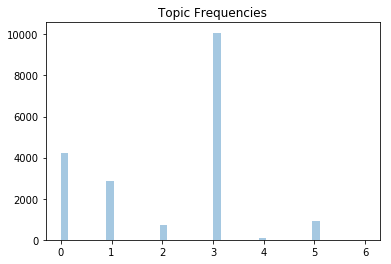

In [88]:
# get and plot the distribution of the topics
from operator import itemgetter
import matplotlib.style as style
import seaborn as sns
top_data = [max(t, key=itemgetter(1))[0] for t in dtopics]
sns.distplot(top_data, kde=False).set_title('Topic Frequencies')

In [89]:
topics = pd.Series(top_data)
df['topic'] = topics.values
df = pd.DataFrame(df)

C:\Users\Aanchal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<b>Topic frequencies between year 2004-2007

C:\Users\Aanchal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Topic Frequencies 2004 - 2007')

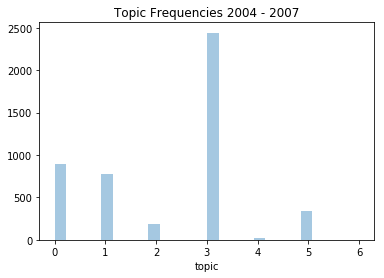

In [90]:
df_04to07 = df[df.Year <= 2007]
sns.distplot(df_04to07['topic'], kde=False).set_title('Topic Frequencies 2004 - 2007')

<b>Topic frequencies between year 2007-2011

C:\Users\Aanchal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Topic Frequencies 2008 - 2011')

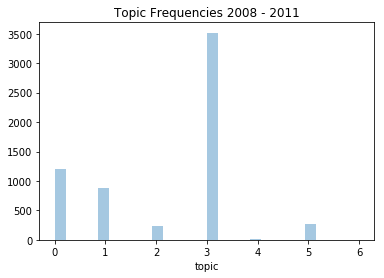

In [91]:
df_08to11 = df[(df['Year'] > 2007) & (df['Year'] <= 2011)]
sns.distplot(df_08to11['topic'], kde=False).set_title('Topic Frequencies 2008 - 2011')

<b>Topic frequencies between year 2011-2015

C:\Users\Aanchal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Topic Frequencies 2012 - 2015')

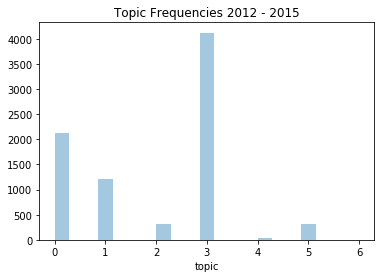

In [92]:

df_12to15 = df[(df['Year'] > 2011) & (df['Year'] <= 2015)]
sns.distplot(df_12to15['topic'], kde=False).set_title('Topic Frequencies 2012 - 2015')